In [1]:
from platform import python_version
print(python_version())

3.10.4


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

In [3]:
def show_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.show()

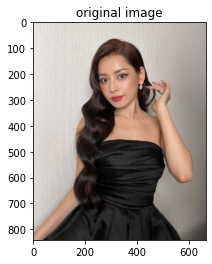

In [4]:
original_image = cv2.imread('image01.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
show_image(original_image, 'original image')

In [5]:
image_size = 8 * np.prod(original_image.shape)
print('The number of bits to store: ', image_size)

The number of bits to store:  13462728


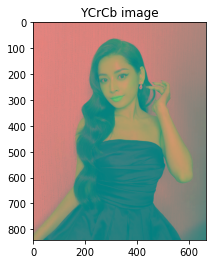

In [6]:
Y_d = cv2.cvtColor(original_image, cv2.COLOR_RGB2YCrCb)
show_image(Y_d, 'YCrCb image')

In [7]:
Y_d[:,:,1] = 2*np.round(Y_d[:,:,1]/2)
Y_d[:,:,2] = 2*np.round(Y_d[:,:,2]/2)

In [8]:
A = np.zeros(Y_d.shape)
B = A

In [9]:
B.shape

(841, 667, 3)

In [10]:
Q = np.array([[17,  18,  24,  47,  99,  99,  99,  99],
            [18,  21,  26,  66,  99,  99,  99,  99],
            [24,  26,  56,  99,  99,  99,  99,  99],
            [47,  66,  99,  99,  99,  99,  99,  99],
            [99,  99,  99,  99,  99,  99,  99,  99],
            [99,  99,  99,  99,  99,  99,  99,  99],
            [99,  99,  99,  99,  99,  99,  99,  99],
            [99,  99,  99,  99,  99,  99,  99,  99]])

In [10]:
# Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # luminance quantization table
#                 [12, 12, 14, 19, 26, 48, 60, 55],
#                 [14, 13, 16, 24, 40, 57, 69, 56],
#                 [14, 17, 22, 29, 51, 87, 80, 62],
#                 [18, 22, 37, 56, 68, 109, 103, 77],
#                 [24, 35, 55, 64, 81, 104, 113, 92],
#                 [49, 64, 78, 87, 103, 121, 120, 101],
#                 [72, 92, 95, 98, 112, 100, 103, 99]])

In [11]:
for channel in range(3):
    for j in range(0, Y_d.shape[0] - 8, 8):
        for k in range(0, Y_d.shape[1] - 8, 8):
            II = Y_d[j:j+8, k:k+8, channel]
            freq = fft.dct(fft.dct(II).T).T
            freq = np.multiply(Q, np.round(np.divide(freq, Q)))
            A[j:j+8, k:k+8, channel] = freq
            B[j:j+8, k:k+8, channel] = fft.idct(fft.idct(freq).T).T            

In [ ]:
# b = A(:);
# b = b(:);
# b(b==0)=[];  %remove zeros.
# b = floor(255*(b-min(b))/(max(b)-min(b)));
# symbols = unique(b);
# prob = histcounts(b,length(symbols))/length(b);
# dict = huffmandict(symbols, prob);
# enco = huffmanenco(b, dict);
# FinalCompressedImage = length(enco)

In [19]:
b = A[:]
b = b[:]
b = np.floor(255*(b-np.min(b)) / (np.max(b) - np.min(b)))
symbols = np.unique(b)
prob = np.histogram(b)

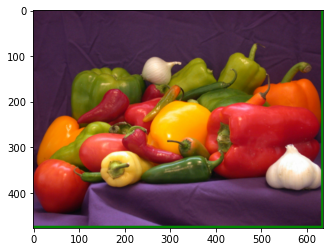

In [12]:
plt.imshow(cv2.cvtColor(np.uint8(B), cv2.COLOR_YCrCb2RGB))
plt.show()

In [13]:
image_size = 8 * np.prod(B.shape)
print('The number of bits to store: ', image_size)

The number of bits to store:  7280928


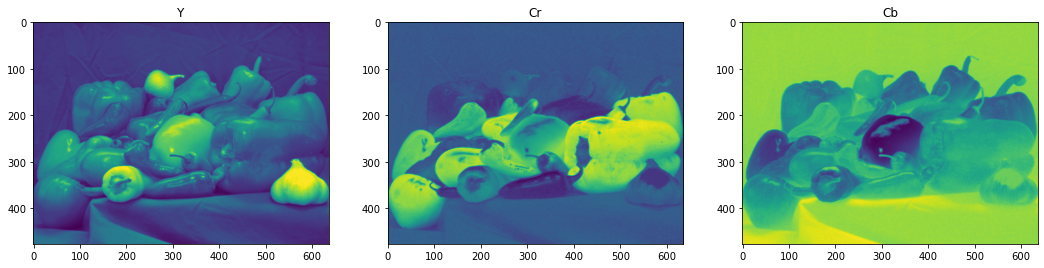

In [7]:
fig = plt.figure(figsize=(18, 18))
titles = ['Y', 'Cr', 'Cb']
for channel in range(3):
    fig.add_subplot(1, 3, channel+1)
    plt.imshow(Y[:, :, channel])
    plt.title(titles[channel])
plt.show()

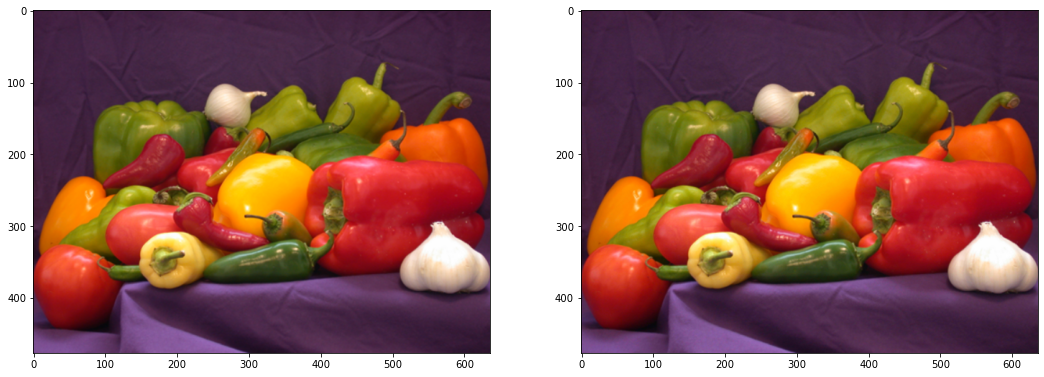

In [8]:
fig = plt.figure(figsize=(18, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)

Y_d = Y
Y_d[:,:,1] = 2*np.round(Y_d[:,:,1]/2);
Y_d[:,:,2] = 2*np.round(Y_d[:,:,2]/2);
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(Y_d, cv2.COLOR_YCrCb2RGB))

plt.show()

array([100., 200., 300., 400., 500., 600.])